## Step 1. Import Library
This code imports the essential libraries and modules needed to build, train, and evaluate a deep learning model for sentiment analysis tasks.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.under_sampling import RandomUnderSampler

## Step 2. Read Data
This code is used to read data, and view column information in the data.

In [2]:
df = pd.read_csv("/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
# Check shape of dataset
df.shape

(23486, 11)

In [4]:
# Display a concise summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


## Step 3. Check Null Value
- This code is used to check for null (missing) values in the dataset.
- There are null values in the Title, Review Text, Division Name, Department Name and Class Name columns.
- However, because sentiment analysis only requires input in the form of Review Text, only null values in that column are dropped.

In [5]:
# Check null value
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [6]:
# Drop rows that have missing values in 'Review Text' column
df = df.dropna(subset=['Review Text'])

# Check for null values after dropping rows
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

## Step 4. Distribution Plot
This section is used to analyze the distribution of ratings and age groups in the dataset.

In [7]:
# Count the number of occurrences of each rating
df["Rating"].value_counts()

Rating
5    12540
4     4908
3     2823
2     1549
1      821
Name: count, dtype: int64

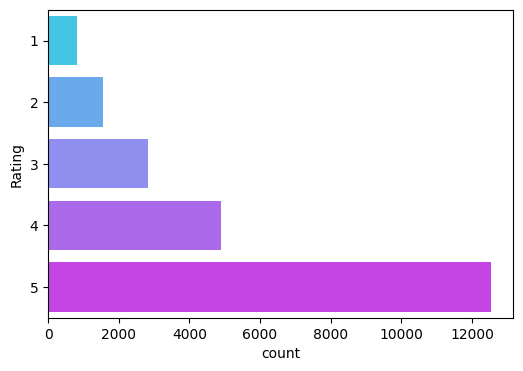

In [8]:
# Plot the count of each rating as a horizontal bar chart
plt.figure(figsize=(6,4))
sns.countplot(y="Rating",data=df,palette="cool")
plt.show()

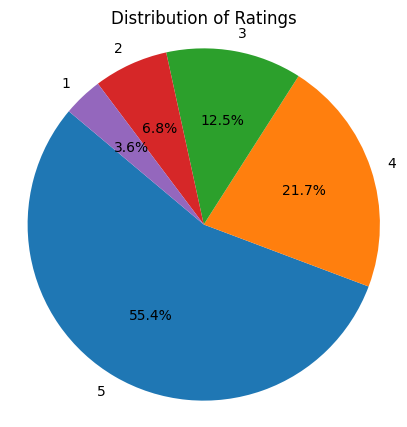

In [9]:
rating_counts = df["Rating"].value_counts()

# Plot the pie chart to show percentage distribution
plt.figure(figsize=(5, 5))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.axis('equal')
plt.show()

In [10]:
# Define age bins and labels for age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Age limit
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']  # Age category label

# Create a new column 'age_group' based on the age bins
df.loc[:, 'age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# See the result
print(df[['Age', 'age_group']].head())

   Age age_group
0   33     30-40
1   34     30-40
2   60     60-70
3   50     50-60
4   47     40-50


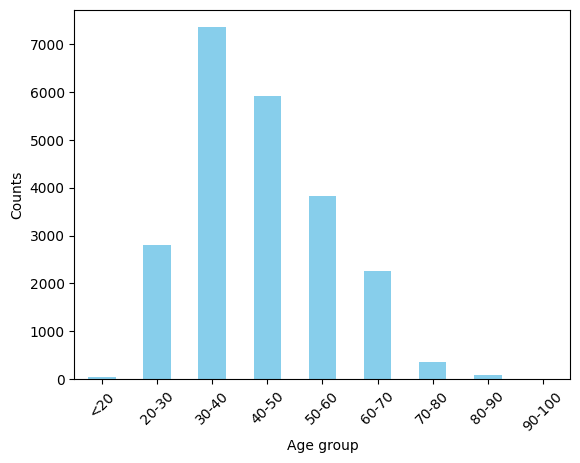

In [11]:
# Get the count of each age group
age_group_counts = df['age_group'].value_counts().sort_index()
age_group_counts.plot(kind='bar', color='skyblue')

# Plot the age group distribution
plt.xlabel('Age group')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

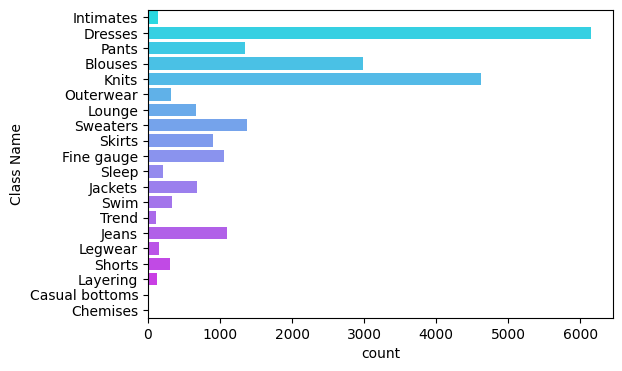

In [12]:
# Plot the product distribution
plt.figure(figsize=(6,4))
sns.countplot(y="Class Name",data=df,palette="cool")
plt.show()

In [13]:
df.rename(columns={"Review Text":"text"},inplace=True)
df.rename(columns={"Recommended IND":"label"},inplace=True)

## Step 5. WordCloud
This section is used to generate word clouds to visualize the most frequent words in the negative and positive reviews based on the sentiment labels.


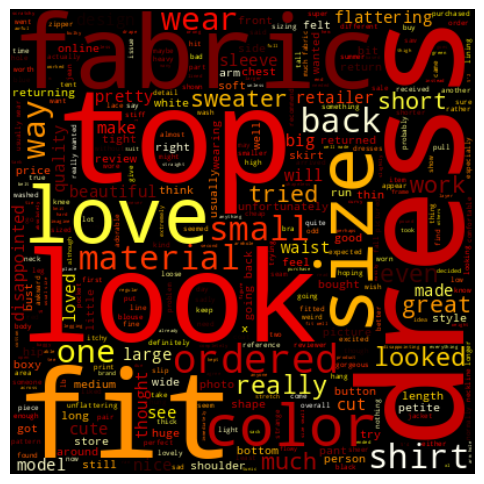

In [14]:
# Negative wordcloud
plt.figure(figsize=(6,8))
negative_wordcloud=df[df["label"] == 0]

negative_text=" ".join(negative_wordcloud['text'].values.tolist())
wordcloud = WordCloud(width=400, height=400,stopwords=STOPWORDS, background_color='black', max_words=500,colormap="hot").generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

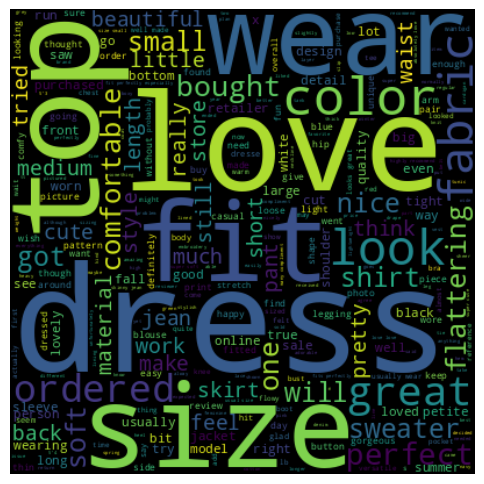

In [15]:
# Positive wordcloud

plt.figure(figsize=(6,8))
positive_wordcloud=df[df["label"]== 1]
positive_text=" ".join(positive_wordcloud['text'].values.tolist())
wordcloud = WordCloud(width=400, height=400,stopwords=STOPWORDS, background_color='black', max_words=500,colormap="viridis").generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Step 6. Sentiment Analysis
- This section is used to preprocess the text data, create a deep learning model for sentiment classification, and compile it using the Keras library.
- Before building the model, we perform several steps to prepare the text data, such as tokenization and padding.
- We use `Tokenizer` to convert the text data into sequences of integers (word indices).
- We pad the sequences to ensure uniform input length for the model.

In [16]:
texts = df['text'].values
labels = df['label'].values

In [17]:
# Split data
x_train, x_remaining, y_train, y_remaining = train_test_split(texts, labels, train_size=0.8, shuffle = True, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_remaining, y_remaining, test_size=0.5, random_state=42, shuffle = True)

# Check the resulting shapes to ensure correct split
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_val: {x_val.shape}, y_val: {y_val.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

x_train: (18112,), y_train: (18112,)
x_val: (2264,), y_val: (2264,)
x_test: (2265,), y_test: (2265,)


In [18]:
# Define hyperparameters for text preprocessing
vocab_size = 200
embedding_dim = 32
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize Tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok) # Change word to number (1, 2, 3)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

# Convert text to sequences
training_sequences = tokenizer.texts_to_sequences(x_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(x_val)
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [19]:
# Convert to numpy arrays
training_padded = np.array(training_padded)
y_train = np.array(y_train)
val_padded = np.array(val_padded)
y_val = np.array(y_val)
testing_padded = np.array(testing_padded)
y_test = np.array(y_test)

In [20]:
# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),  # Define input shape here
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=32),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 50, 32)              │           6,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,741 (26.33 KB)

 Trainable params: 6,741 (26.33 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
num_epochs = 200
history = model.fit(training_padded, 
                    y_train,
                    epochs=num_epochs, 
                    validation_data=(val_padded, y_val), 
                    verbose=2,
                    callbacks = [early_stopping, reduce_lr])

Epoch 1/200
566/566 - 4s - 7ms/step - accuracy: 0.8179 - loss: 0.5192 - val_accuracy: 0.8246 - val_loss: 0.4596 - learning_rate: 0.0010
Epoch 2/200
566/566 - 1s - 1ms/step - accuracy: 0.8184 - loss: 0.4517 - val_accuracy: 0.8246 - val_loss: 0.4231 - learning_rate: 0.0010
Epoch 3/200
566/566 - 1s - 1ms/step - accuracy: 0.8184 - loss: 0.4119 - val_accuracy: 0.8246 - val_loss: 0.3900 - learning_rate: 0.0010
Epoch 4/200
566/566 - 1s - 1ms/step - accuracy: 0.8275 - loss: 0.3876 - val_accuracy: 0.8295 - val_loss: 0.3741 - learning_rate: 0.0010
Epoch 5/200
566/566 - 1s - 1ms/step - accuracy: 0.8383 - loss: 0.3740 - val_accuracy: 0.8348 - val_loss: 0.3640 - learning_rate: 0.0010
Epoch 6/200
566/566 - 1s - 2ms/step - accuracy: 0.8415 - loss: 0.3645 - val_accuracy: 0.8344 - val_loss: 0.3603 - learning_rate: 0.0010
Epoch 7/200
566/566 - 1s - 1ms/step - accuracy: 0.8425 - loss: 0.3588 - val_accuracy: 0.8370 - val_loss: 0.3532 - learning_rate: 0.0010
Epoch 8/200
566/566 - 1s - 1ms/step - accuracy: 

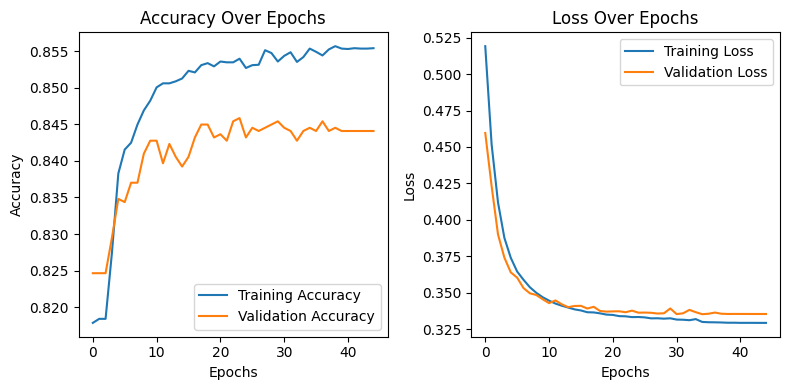

In [24]:
plt.figure(figsize=(8, 4))

# Accuracy plot
plt.subplot(1, 2, 1)  # Create a 1x2 grid, first subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)  # Second subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

## Step 7. Evaluation
- This code is used to evaluate model using the `evaluate` method on the test data.
- Next, the model predicts the labels for the test data using the predict method.
- A confusion matrix is calculated to evaluate the model’s performance by comparing the predicted classes against the true labels.
- The classification report provides a detailed performance summary, including precision, recall, f1-score, and support for each class. 

In [25]:
# Evaluate the model
loss, accuracy = model.evaluate(testing_padded, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8503 - loss: 0.3176
Test Loss: 0.3266940414905548
Test Accuracy: 0.8481236100196838


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


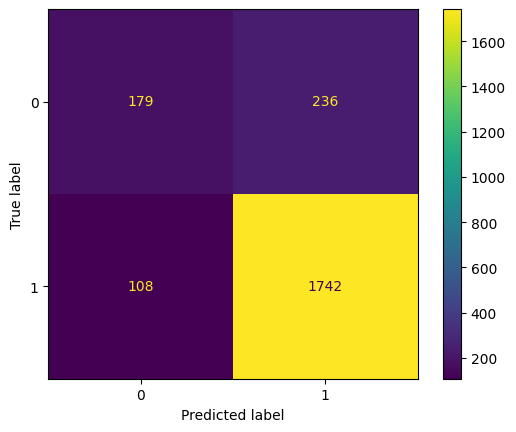

In [26]:
# Compute confusion matrix

y_pred_prob = model.predict(testing_padded)
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [27]:
# Compute classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.43      0.51       415
           1       0.88      0.94      0.91      1850

    accuracy                           0.85      2265
   macro avg       0.75      0.69      0.71      2265
weighted avg       0.83      0.85      0.84      2265



Even though the accuracy is good (85%), it can be seen that the precision, recall, and f1-score of label 0 are very low. This is due to an imbalanced dataset where data with label 1 is so large.

## Step 8. Save Model

In [28]:
!pip install tensorflowjs

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 18.1.0 which is incompatible.
distributed 2024.8.0 requires dask==2024.8.0, but you have dask 2024.12.1 which is incompatible.
pandas-gbq 0.23.1 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.


In [29]:
import tensorflowjs as tfjs

# Save the model in HDF5 format
model.save('model_3d.h5')

# Save model in .keras format
model.save('model_3d.keras')

# Save model in TensorFlow.js format
tfjs.converters.save_keras_model(model, 'model_3d_tfjs')

failed to lookup keras version from the file,
    this is likely a weight only file


In [30]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to .tflite file
with open('model_3d.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp_nq6fgkq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 50), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139161239140160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139161239136112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139161239134528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139161239133296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139161239130128: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [31]:
model.export("saved_model_3d")

Saved artifact at 'saved_model_3d'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 50), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139161239140160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139161239136112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139161239134528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139161239133296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139161239130128: TensorSpec(shape=(), dtype=tf.resource, name=None)
